## WEEK 9 IN-MODULE EXERCISE 
- In this exercise, you'll explore plate motion data using Pandas
- One focus will be on *merging* data

**Context**: 
- Iceland lies on a *divergent plate boundary* - North American plate (western portion of Iceland) is moving west relate to the Eurasian plate (eastern portion of Iceland)
- *Consequences*: Mid-Atlantic Ridge - new crust created at divergent boundary where magma wells up
    - volcanoes!
<br><br>

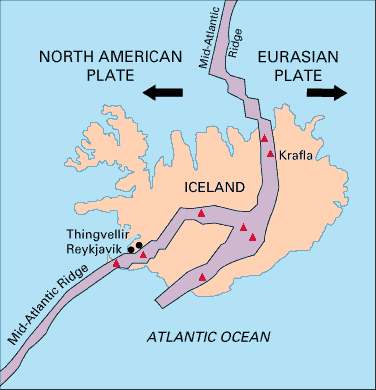

Can't view image?  See the North American Plate/Euarsian Plate/Iceland map at: https://pubs.usgs.gov/gip/dynamic/understanding.html
<br><br>
**Data**:
 - plate motion measured by GPS instruments from 1995/1997 until 2020 in:
   - Reykjavik (North American plate): http://geodesy.unr.edu/NGLStationPages/stations/REYK.sta 
   - Hofn (Eurasian plate): http://geodesy.unr.edu/NGLStationPages/stations/HOFN.sta 
  - the data is separated by DECADE, so there are three separate files for each plate 

In [114]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob # May need to install this!
import requests

### (1)  First, read in the data and do some initial processing
*Files are on http://rfd.atmos.uiuc.edu/Atms517/week9/ and named as follows*
- HOFN.tenv3.1997_1999.csv
- HOFN.tenv3.2000_2009.csv
- HOFN.tenv3.2010_2019.csv
- REYK.tenv3.1995_1999.csv
- REYK.tenv3.2000_2009.csv
- REYK.tenv3.2010_2019.csv


##### (a.)  Download the data using Python



In [115]:
from os import path
base_u = 'http://rfd.atmos.uiuc.edu/Atms517/week9/'
data_d = 'data'
hofn_files = ['HOFN.tenv3.1997_1999.csv', 'HOFN.tenv3.2000_2009.csv', 'HOFN.tenv3.2010_2019.csv']
reyk_files = ['REYK.tenv3.1995_1999.csv', 'REYK.tenv3.2000_2009.csv', 'REYK.tenv3.2010_2019.csv']
def download_files(base_uri, data_dir, files, selector):
    for f in files:
        f_uri = path.join(base_uri, f)
        print(f'Downloading file: {f_uri}')
        r = requests.get(f_uri, allow_redirects=True)
        dest = path.join(data_dir, selector, f)
        open(dest, 'wb').write(r.content)
download_files(base_u, data_d, hofn_files, 'hofn')
download_files(base_u, data_d, reyk_files, 'reyk')

##### (b.) Create a list of filenames using glob.glob (see one of your lessons this week)

In [116]:
# But I already have the filenames, and glob is computationally slow

##### (c.) Then, read in the data - how might you use flow control to help with this?


In [117]:
hofn_files = ['HOFN.tenv3.1997_1999.csv', 'HOFN.tenv3.2000_2009.csv', 'HOFN.tenv3.2010_2019.csv']
reyk_files = ['REYK.tenv3.1995_1999.csv', 'REYK.tenv3.2000_2009.csv', 'REYK.tenv3.2010_2019.csv']
def create_df(data_dir, selector, filename):
    full_p = path.join(data_dir, selector, filename)
    return pd.read_csv(full_p)
def create_dfs(data_dir, selector, files):
    dfs = []
    for f in files:
        df = create_df(data_dir, selector, f)
        dfs.append(df)
    return dfs

reyk_dfs = create_dfs(data_d, 'reyk', reyk_files)
hofn_dfs = create_dfs(data_d, 'hofn', hofn_files)

##### (d.)  Time to merge our dataframes
- where things stand from end of (c.) is you have two lists of dataframes
- using the dataframes contained in each list, we actually want to *merge* the dataframes together into a single dataframe - one for REYK, one for HOFN
<br><br>
- *what direction are you merging in?  what should you do with the indices?*

In [118]:
# Print the new data structures to confirm the merge was done correctly
reyk_df = pd.concat(reyk_dfs, axis=0, ignore_index=True)
hofn_df = pd.concat(hofn_dfs, axis=0, ignore_index=True)


##### (e.)  Let's do some processing
(i.) *first, dealing with time*
- the time data is all a bit messy
- let's convert what we do have into a Pandas datetime object that is easier to work with
<br><br>
- one time-related column we can use, and how we'd convert it: 

**df2['time'] = pd.to_datetime(df2['__MJD']+2400000.5,unit='D',origin='julian')**
  - we used the '_MJD' column - this is time in 'Modified Julian time.'  We can look that up and see that we'll have to add a certain # to modified Julian time to get into traditional Julian time.  We'll also have to specify unit as day ('D'), and origin of the time as 'julian'
  - this is good practice, of a particularly messy time format
  - you'll formally learn this functionality VERY SOON

(ii.) *now, let's rename columns*
- rename __east(m) to east disp, and _north(m) to north disp (where disp is short for 'displacement')

(iii.) *print out first few lines of each of your two data structures to prove to yourself that you did all of the above properly*

(iv.)  *finally, convert your east disp and north disp columns from m to mm* 

In [119]:
# (i, ii, iii, iv)
reyk_df = reyk_df.rename(columns={
    '__east(m)': 'east disp',
    '_north(m)': 'north disp'})
hofn_df = hofn_df.rename(columns={
    '__east(m)': 'east disp',
    '_north(m)': 'north disp'})
print(f'Heads of each:\n{reyk_df.head(1)}\n{hofn_df.head(1)}')
reyk_df['east disp']  = reyk_df['east disp'] * 1000
reyk_df['north disp'] = reyk_df['north disp'] * 1000
hofn_df['east disp']  = hofn_df['east disp'] * 1000
hofn_df['north disp'] = hofn_df['north disp'] * 1000

Heads of each:
   site  YYMMMDD  yyyy.yyyy  __MJD  week  d  reflon  _e0(m)  east disp  \
0  REYK  95DEC31  1995.9973  50082   834  0     -22    2167   0.448043   

   ____n0(m)  north disp  u0(m)  ____up(m)  _ant(m)  sig_e(m)  sig_n(m)  \
0    7115325    0.356049     93   0.038789    0.068  0.000739  0.001058   

   sig_u(m)  __corr_en  __corr_eu  __corr_nu  
0  0.003331  -0.005008     0.0441   0.108514  
   site  YYMMMDD  yyyy.yyyy  __MJD  week  d  reflon  _e0(m)  east disp  \
0  HOFN  97JUN29  1997.4921  50628   912  0   -15.2     100   0.680912   

   ____n0(m)  north disp  u0(m)  ____up(m)  _ant(m)  sig_e(m)  sig_n(m)  \
0    7129651    0.546061     82   0.579593    0.055  0.000702  0.001023   

   sig_u(m)  __corr_en  __corr_eu  __corr_nu  
0  0.003128   -0.01721   -0.00848   0.154619  


### (2)  Next, produce some initial plots
- specifically, a scatter plot each for REYK and HOFN
- x-axis: east displacement; y-axis, north displacement

<AxesSubplot:xlabel='east disp'>

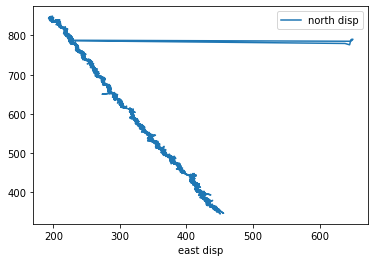

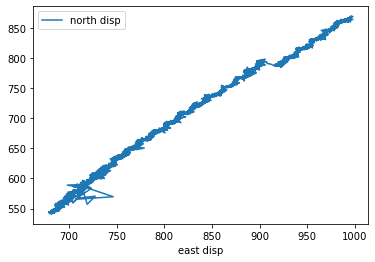

In [120]:
reyk_df.plot(x='east disp', y='north disp')
hofn_df.plot(x='east disp', y='north disp')

### (3) Based on the plots in Q2, do any necessary data cleaning in whatever way you'd like.  
- And then create the scatter plots again to prove that you cleaned the data in the way you felt you needed to

<AxesSubplot:xlabel='east disp'>

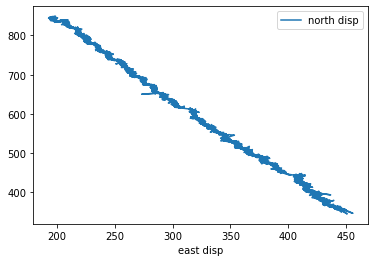

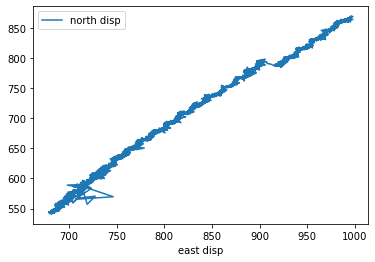

In [121]:
# Rip things out by IQR
cols = ['east disp', 'north disp'] # one or more
Q1 = reyk_df[cols].quantile(0.25)
Q3 = reyk_df[cols].quantile(0.75)
IQR = Q3 - Q1
reyk_df = reyk_df[~((reyk_df[cols] < (Q1 - 1.5 * IQR)) |(reyk_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

Q1 = hofn_df[cols].quantile(0.25)
Q3 = hofn_df[cols].quantile(0.75)
IQR = Q3 - Q1
hofn_df = hofn_df[~((hofn_df[cols] < (Q1 - 1.5 * IQR)) |(hofn_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
reyk_df.plot(x='east disp', y='north disp')
hofn_df.plot(x='east disp', y='north disp')

### (4)  Per the official data pages shared at the start of this assignment, displacement in a given direction at a station is considered relative to the mean displacement in that given direction at that station over the period these data were collected (for each of the two stations).  

### So - calculate and save this for the east displacement and the north displacement for each HOFN and REYK data. (So...for four variables).

In [122]:
hofn_e_disp = hofn_df['east disp'] - hofn_df['east disp'].mean()
hofn_n_disp = hofn_df['north disp'] - hofn_df['north disp'].mean()
reyk_e_disp = reyk_df['east disp'] - reyk_df['east disp'].mean()
reyk_n_disp = reyk_df['north disp'] - reyk_df['north disp'].mean()

### (5)  Create a panel plot of your results from Q4

#### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#### MINI LESSON ON CREATING SUBPLOTS!!
#### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

- fig, axes = plt.subplots(2,2,....)
- where 2,2 is nrows, ncols in the plot (nrows * ncols = total # of subplots)
<br><br>

*To create each subplot*
- axes[row index, col index].plot(....) where [row index, col index] are of the rows/columns in your panel figure
- axes[row index, col index].set_title(.....)
- in the above, we're using a SPECIFIC (subplot) axis to create a plot on and add features to the plot
  - example: making upper left plot in this overall plot of 4 subplots?
  - axes[0,0]......
 
#### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#### BACK TO Q5!!
#### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

*Make sure you include*
- titles, axis labels, etc. 
<br><br>

*Optional challenges*
- use loops to better automate the production and adding of features/labels to each subplot

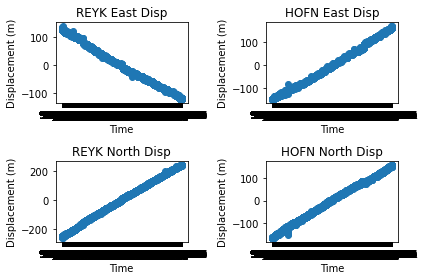

In [123]:
fig, axs = plt.subplots(2, 2)
for i, axa in enumerate(axs):
    for j in range(2):        
        ax = axa[j]
        ax.set_ylabel('Displacement (m)')
        ax.set_xlabel('Time')
        if i % 2 == 0 and j % 2 == 0:
            ax.set_title('REYK East Disp')
            x = reyk_df['YYMMMDD']
            y = reyk_e_disp
        if i % 2 != 0 and j % 2 == 0:
            ax.set_title('REYK North Disp')
            x = reyk_df['YYMMMDD']
            y = reyk_n_disp
        if i % 2 == 0 and j % 2 != 0:
            ax.set_title('HOFN East Disp')
            x = hofn_df['YYMMMDD']
            y = hofn_e_disp
        if i % 2 != 0 and j % 2 != 0:
            ax.set_title('HOFN North Disp')
            x = hofn_df['YYMMMDD']
            y = hofn_n_disp
        ax.scatter(x, y)
fig.tight_layout()

### (6)  Interpret your results in Q5.  Describe which direction each plate is moving over time.  Is this consistent with a divergent plate boundary?  Why or why not?

The data seems to indicate that the North American plate is moving slightly northwest, while the Eurasian plate is traveling northeast. This behavior is indeed indicative of a divergent plate boundary, and the resultant volcanos across iceland are obvious.

### (7)  Finally, plot, on a map, the location of each of the stations (you can find the lat/lon info on the webpages shared at start of assignment).  Include any features you think are helpful on your map.
- *Optional challenge*: plot vectors/arrows showing the *annual* average plate motion, one for each of the two station locations

Text(0, 10, 'REYK')

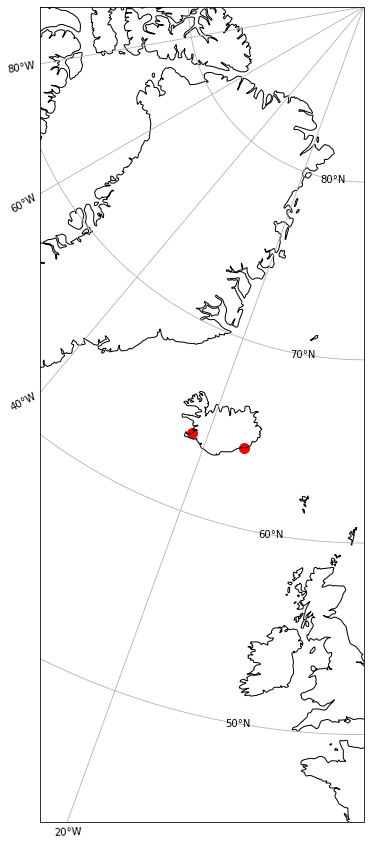

In [133]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.colors as mcolors

#X, Y = np.meshgrid(lon, lat)
proj = ccrs.NorthPolarStereo()
fig, ax = plt.subplots(figsize=(15,15), subplot_kw=dict(projection=proj))

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.coastlines()
lonmin = -23
lonmax = -10
latmin = 45
latmax = 90
bounds = [ lonmin, lonmax, latmin, latmax ]
ax.set_extent(bounds)

lons = [-21.955, -15.198]
lats = [64.139, 64.267]
ax.scatter(lons, lats, s=100, c='red', transform=ccrs.PlateCarree())

# REYK
# Latitude: 64.139 degrees   Longitude: -21.955 degrees
# HOFN
# Latitude: 64.267 degrees   Longitude: -15.198 degrees